<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
warnings.filterwarnings('ignore')

Mounted at /content/drive


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [2]:
data=pd.read_csv('drive/MyDrive/ML_course/marketing_campaign.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [6]:
data['total_sum']=data[['MntWines'
,'MntFruits'
,'MntMeatProducts'
,'MntFishProducts'
,'MntSweetProducts'
,'MntGoldProds']].aggregate(func='sum', axis=1)

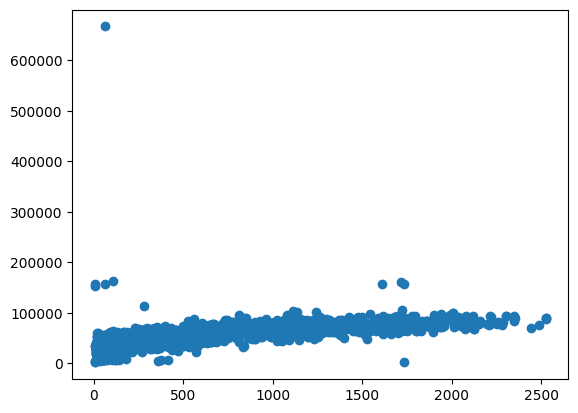

In [7]:
plt.scatter(data['total_sum'], data['Income']);

In [8]:
data['total_sum'].describe()

,total_sum
count,2240.000000
mean,605.798214
std,602.249288
min,5.000000
25%,68.750000
50%,396.000000
75%,1045.500000
max,2525.000000


In [9]:
bins=[0, 100,300,400,500,700,1000,2045]
labels=['0-99','100-299','300-399','400-499','500-699','700-999','1000+']

In [10]:
data['sum_group']=pd.cut(data['total_sum'], bins=bins, labels=labels, right=False)

In [11]:
mean_income=data.groupby(['sum_group'])['Income'].transform('mean')

In [12]:
data['Income'].fillna(mean_income, inplace=True)

Враховуючи тенденцію до збільшення витрат зі збільшенням доходу Income, я порахувала сумарні витрати клієнта, враховуючи всі категорії товарів, розбила витрати клієнтів на групи та заповнила середнім значенням відсутні значення Income відповідно до групи за значенням сумарних витрат, до якої належить клієнт.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [13]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [14]:
data['lifetime']=(data['Dt_Customer'].max()-data['Dt_Customer']).dt.days

In [15]:
data.select_dtypes('object').columns

Index(['Education', 'Marital_Status'], dtype='object')

In [16]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [17]:
data = data[~data['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [18]:
data['Marital_Status']=np.where(data['Marital_Status']=='Alone', 'Single', data['Marital_Status'])

In [19]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [20]:
ordinal=OrdinalEncoder(categories=[['Basic','Graduation', '2n Cycle','Master','PhD']])
ed_encode=pd.DataFrame(ordinal.fit_transform(data[['Education']]), columns=['Education'])

In [21]:
data.drop(['Dt_Customer','sum_group'], axis=1, inplace=True)

In [22]:
numeric_cols=data.select_dtypes(exclude='object').columns.tolist()

In [23]:
onehot=OneHotEncoder()
onehot_cols=pd.DataFrame(onehot.fit_transform(data[['Marital_Status']]).toarray(), columns=onehot.categories_[0])
onehot.categories_

[array(['Divorced', 'Married', 'Single', 'Together', 'Widow'], dtype=object)]

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [24]:
X=pd.concat([data[numeric_cols].reset_index(drop=True), onehot_cols.reset_index(drop=True), ed_encode.reset_index(drop=True)], axis=1)

In [25]:
X

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,total_sum,lifetime,Divorced,Married,Single,Together,Widow,Education
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,1,1617,663,0.0,0.0,1.0,0.0,0.0,1.0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,27,113,0.0,0.0,1.0,0.0,0.0,1.0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,776,312,0.0,0.0,0.0,1.0,0.0,1.0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,53,139,0.0,0.0,0.0,1.0,0.0,1.0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,422,161,0.0,1.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,1341,381,0.0,1.0,0.0,0.0,0.0,1.0
2232,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,0,444,19,0.0,0.0,0.0,1.0,0.0,4.0
2233,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,1241,155,1.0,0.0,0.0,0.0,0.0,1.0
2234,8235,1956,69245.0,0,1,8,428,30,214,80,...,0,0,843,156,0.0,0.0,0.0,1.0,0.0,3.0


In [26]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[1 0 1 ... 1 1 1]


In [27]:
centroids=kmeans.cluster_centers_

In [28]:
score=metrics.silhouette_score(X, labels, metric='euclidean')
score

np.float64(0.5769661965157421)

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

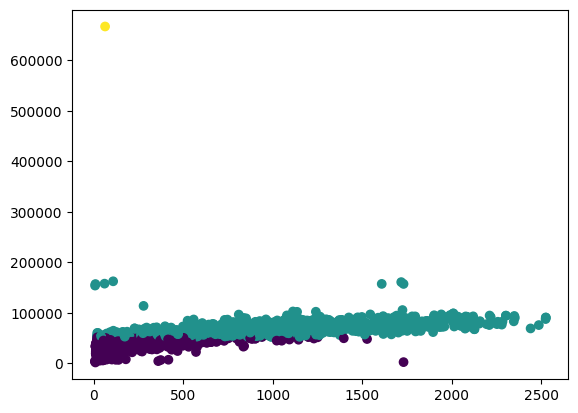

In [29]:
plt.scatter(X['total_sum'], X['Income'], c=labels)

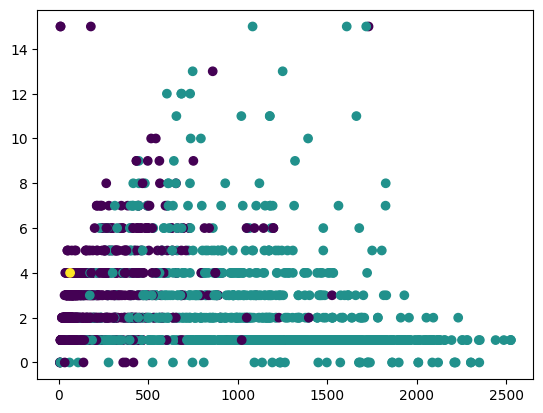

In [30]:
plt.scatter( X['total_sum'], X['NumDealsPurchases'], c=labels)

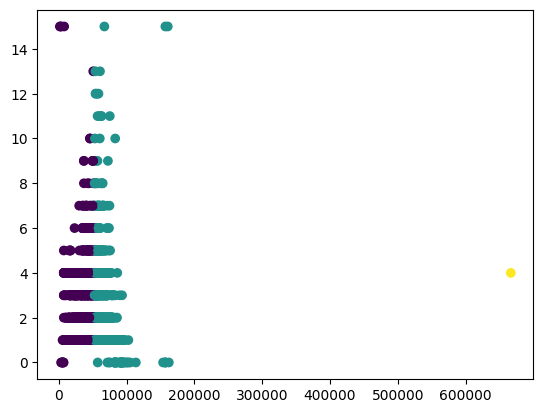

In [31]:
plt.scatter( X['Income'], X['NumDealsPurchases'], c=labels)

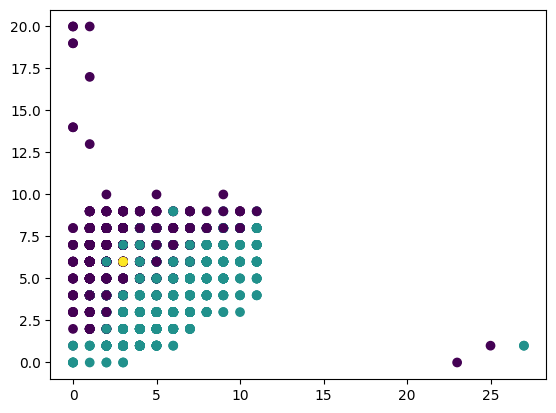

In [32]:
plt.scatter(X['NumWebPurchases'], X['NumWebVisitsMonth'], c=labels)

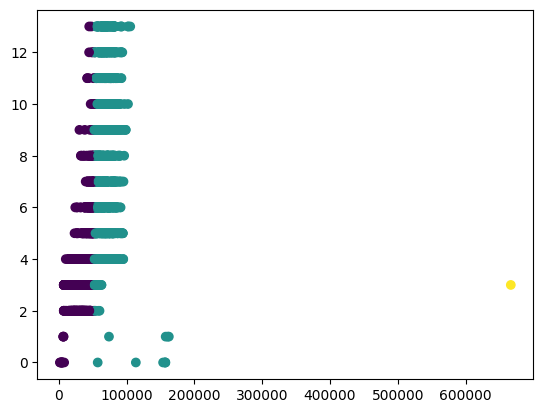

In [33]:
plt.scatter(X['Income'], X['NumStorePurchases'], c=labels)

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [34]:
scaler=StandardScaler()
num_enc=pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=data[numeric_cols].columns.tolist())

In [35]:
X_scaled=pd.concat([num_enc, onehot_cols.reset_index(drop=True), ed_encode.reset_index(drop=True)], axis=1)

In [36]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_scaled)

labels = kmeans.predict(X_scaled)
print(labels)

[0 2 1 ... 1 1 2]


In [37]:
centroids=kmeans.cluster_centers_

In [38]:
score=metrics.silhouette_score(X_scaled, labels, metric='euclidean')
score

np.float64(0.15596383934813765)

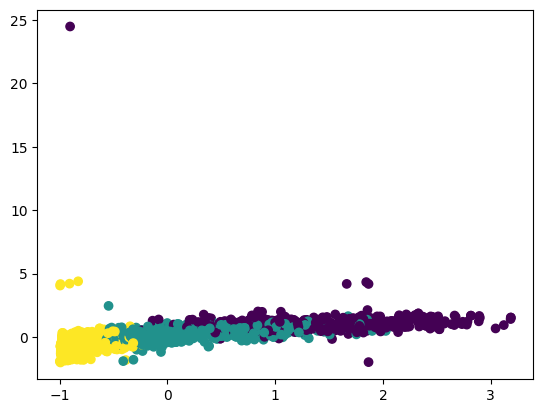

In [39]:
plt.scatter(X_scaled['total_sum'], X_scaled['Income'], c=labels)

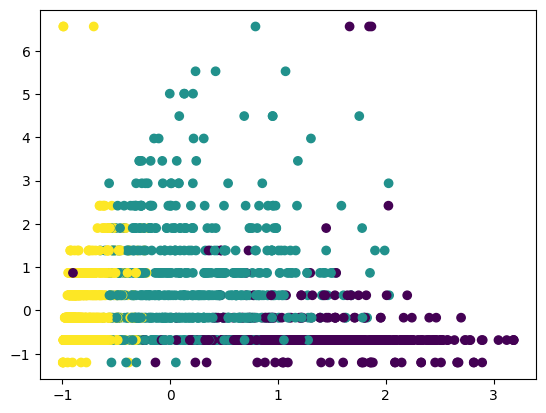

In [40]:
plt.scatter( X_scaled['total_sum'], X_scaled['NumDealsPurchases'], c=labels)

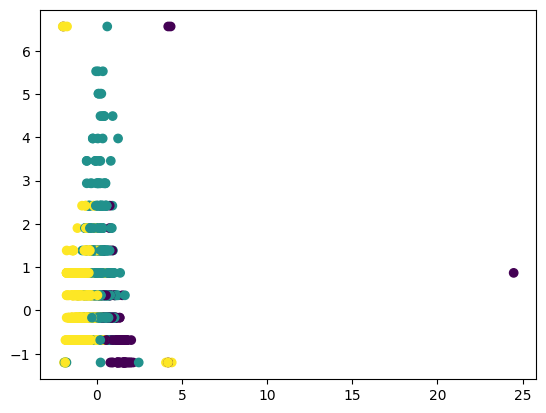

In [41]:
plt.scatter( X_scaled['Income'], X_scaled['NumDealsPurchases'], c=labels)

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [42]:
data=data[data['Income']<=113734]

In [43]:
onehot=OneHotEncoder()
onehot_cols=pd.DataFrame(onehot.fit_transform(data[['Marital_Status']]).toarray(), columns=onehot.categories_[0])
onehot.categories_

[array(['Divorced', 'Married', 'Single', 'Together', 'Widow'], dtype=object)]

In [44]:
ordinal=OrdinalEncoder(categories=[['Basic','Graduation', '2n Cycle','Master','PhD']])
ed_encode=pd.DataFrame(ordinal.fit_transform(data[['Education']]), columns=['Education'])

In [45]:
scaler=StandardScaler()
num_enc=pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=data[numeric_cols].columns.tolist())

In [46]:
X_wo_outliers=pd.concat([num_enc, onehot_cols.reset_index(drop=True), ed_encode.reset_index(drop=True)], axis=1)

In [47]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_wo_outliers)

labels = kmeans.predict(X_wo_outliers)
print(labels)

[2 0 2 ... 2 2 0]


In [48]:
score=metrics.silhouette_score(X_wo_outliers, labels, metric='euclidean')
score

np.float64(0.20005261867493976)

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

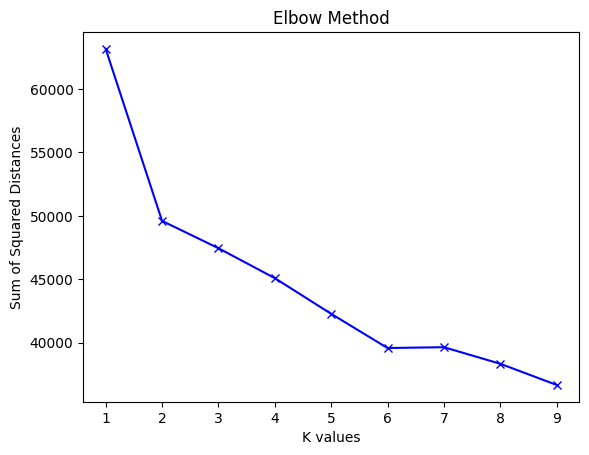

In [49]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_wo_outliers)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X_wo_outliers)

labels = kmeans.predict(X_wo_outliers)
print(labels)

[3 1 2 ... 2 2 1]


In [51]:
centroids=kmeans.cluster_centers_

In [52]:
score=metrics.silhouette_score(X_wo_outliers, labels, metric='euclidean')
score

np.float64(0.0771586958202738)

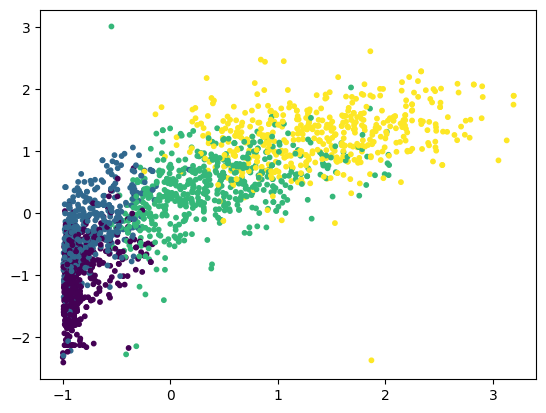

In [53]:
plt.scatter(X_wo_outliers['total_sum'], X_wo_outliers['Income'], c=labels, s=10)

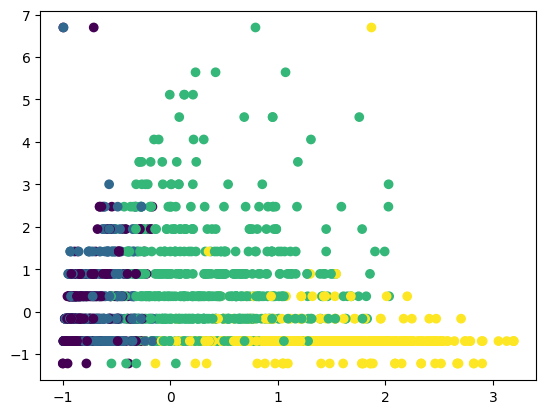

In [54]:
plt.scatter(X_wo_outliers['total_sum'], X_wo_outliers['NumDealsPurchases'], c=labels)

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [58]:
X=pd.concat([data[numeric_cols].reset_index(drop=True), onehot_cols.reset_index(drop=True), ed_encode.reset_index(drop=True)], axis=1)

In [59]:
X

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,total_sum,lifetime,Divorced,Married,Single,Together,Widow,Education
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,1,1617,663,0.0,0.0,1.0,0.0,0.0,1.0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,27,113,0.0,0.0,1.0,0.0,0.0,1.0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,776,312,0.0,0.0,0.0,1.0,0.0,1.0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,53,139,0.0,0.0,0.0,1.0,0.0,1.0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,422,161,0.0,1.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,1341,381,0.0,1.0,0.0,0.0,0.0,1.0
2224,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,0,444,19,0.0,0.0,0.0,1.0,0.0,4.0
2225,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,1241,155,1.0,0.0,0.0,0.0,0.0,1.0
2226,8235,1956,69245.0,0,1,8,428,30,214,80,...,0,0,843,156,0.0,0.0,0.0,1.0,0.0,3.0


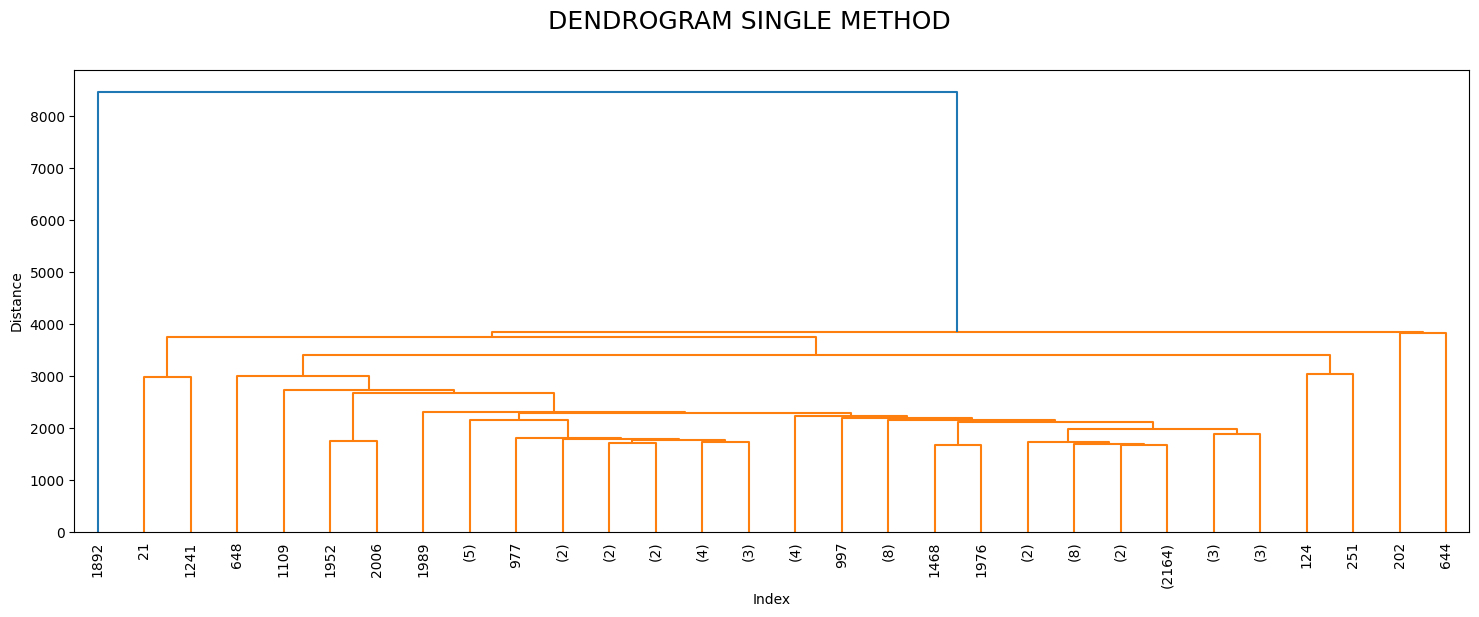

In [60]:
dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90,truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [61]:
X['2_cluster']=fcluster(dist_sin, 2, criterion='maxclust')
X['3_cluster']=fcluster(dist_sin, 3, criterion='maxclust')

<Axes: xlabel='total_sum', ylabel='Income'>

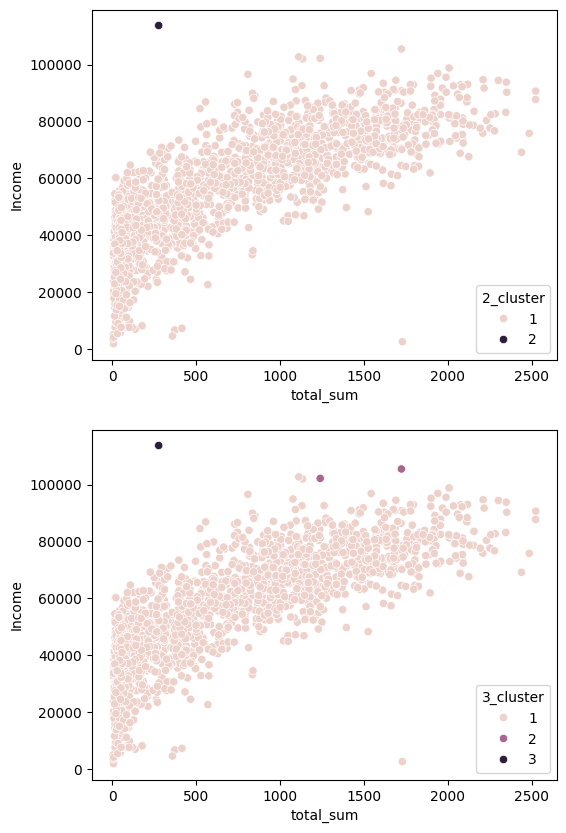

In [68]:
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
sns.scatterplot(x='total_sum', y='Income', data=X, hue='2_cluster')
plt.subplot(2,1,2)
sns.scatterplot(x='total_sum', y='Income', data=X, hue='3_cluster')

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?